In [1]:
# Reference 
# https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/


import datetime
import pandas as pd
from pandas_datareader import data

start = datetime.datetime(2016,1,1)
end = datetime.date.today()

# Collect Google stock data
apple = data.DataReader('AAPL', 'google', start, end)
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,102.61,105.37,102.00,105.35,67281190
2016-01-05,105.75,105.85,102.41,102.71,55790992
2016-01-06,100.56,102.37,99.87,100.70,68457388
2016-01-07,98.68,100.13,96.43,96.45,81094428
2016-01-08,98.55,99.11,96.76,96.96,70798016


In [7]:
amzn = data.get_quote_yahoo('AMZN')
amzn

,PE,change_pct,last,short_ratio,time
AMZN,186.01,+2.44%,987.71,2.09,4:00pm


Populating the interactive namespace from numpy and matplotlib


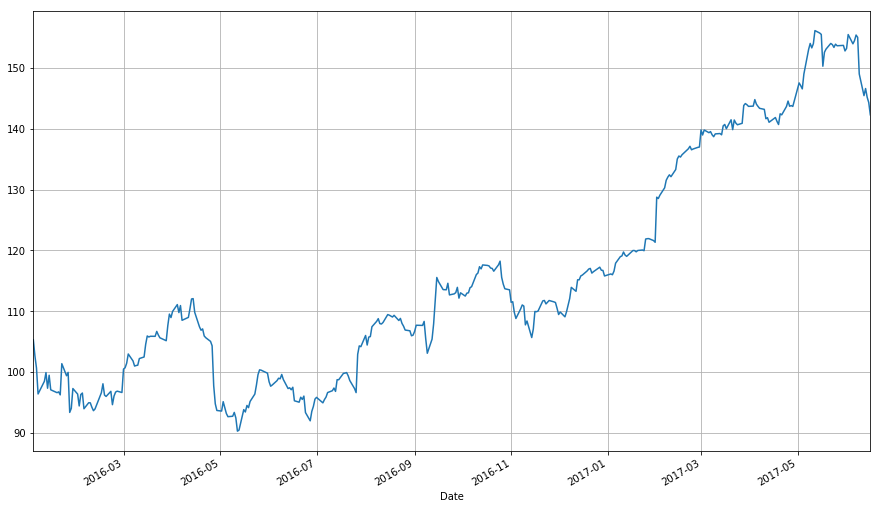

In [4]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

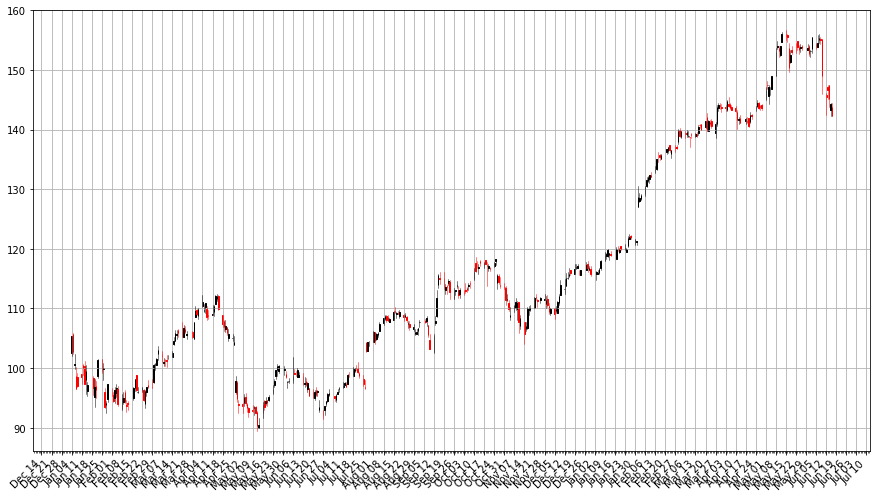

In [5]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(apple)

In [6]:
microsoft = data.DataReader("MSFT", "google", start, end)
google = data.DataReader("GOOG", "google", start, end)
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Close"],
                      "MSFT": microsoft["Close"],
                      "GOOG": google["Close"]})
 
stocks.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,105.35,741.84,54.80
2016-01-05,102.71,742.58,55.05
2016-01-06,100.70,743.62,54.05
2016-01-07,96.45,726.39,52.17
2016-01-08,96.96,714.47,52.33


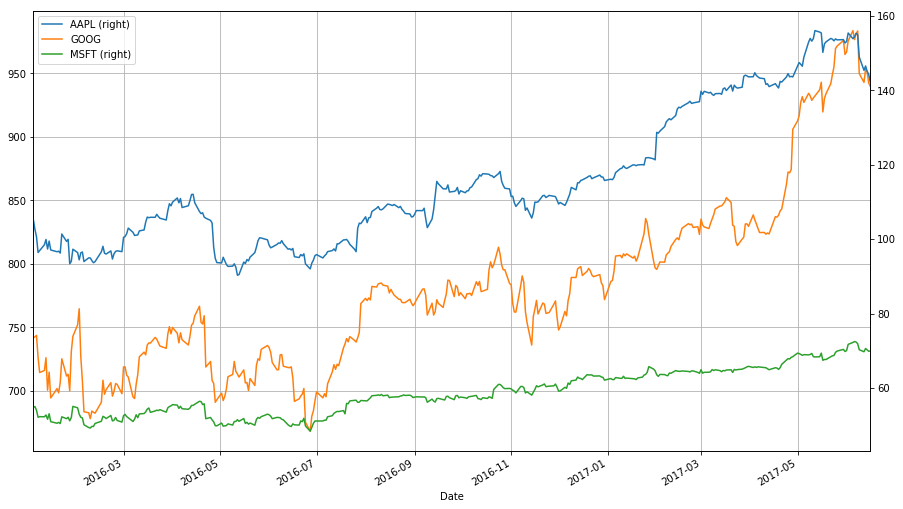

In [8]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

In [9]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,1.000000,1.000000,1.000000
2016-01-05,0.974941,1.000998,1.004562
2016-01-06,0.955861,1.002399,0.986314
2016-01-07,0.915520,0.979173,0.952007
2016-01-08,0.920361,0.963105,0.954927


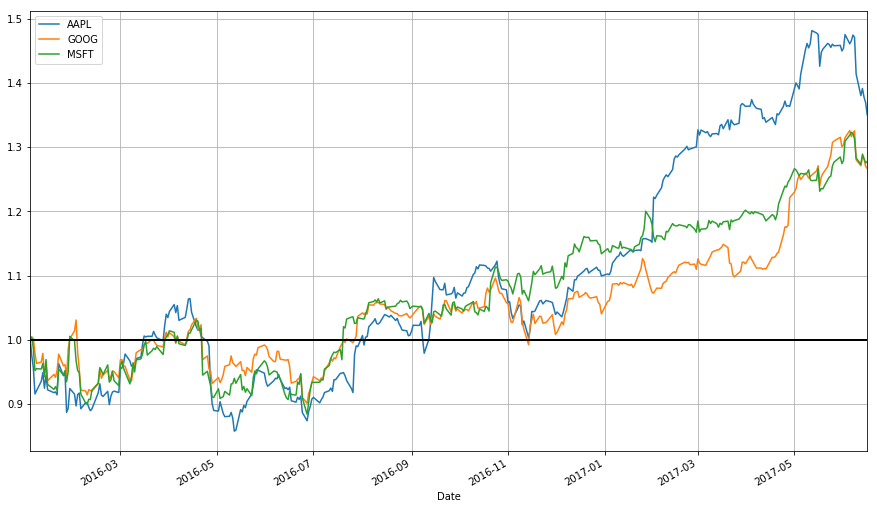

In [10]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [11]:
import numpy as np
 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025379,0.000997,0.004552
2016-01-06,-0.019764,0.001400,-0.018332
2016-01-07,-0.043121,-0.023443,-0.035402
2016-01-08,0.005274,-0.016546,0.003062


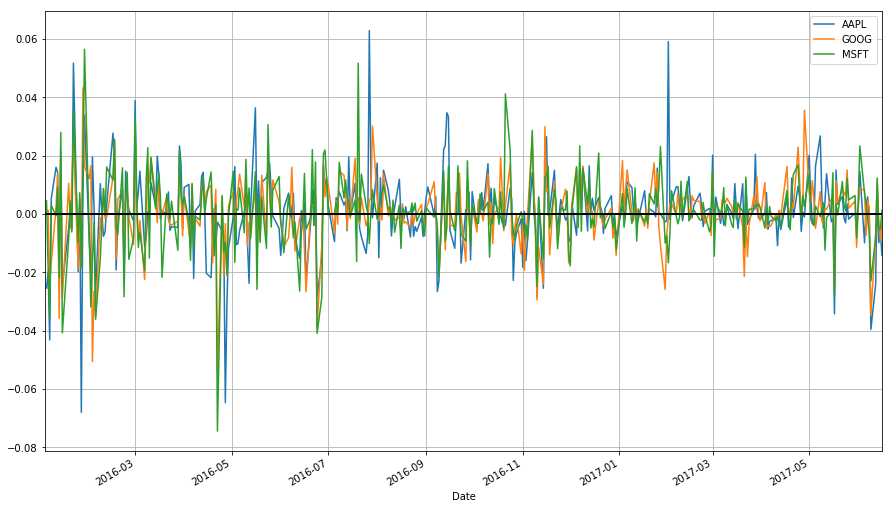

In [12]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

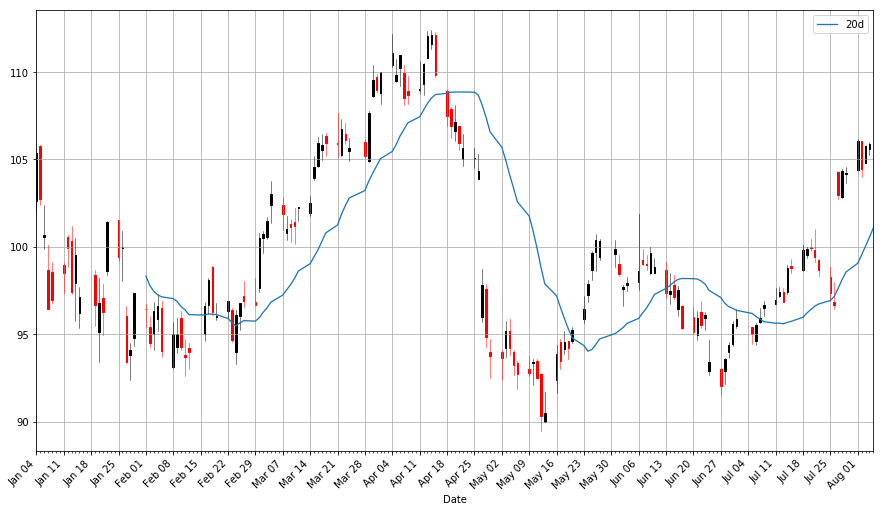

In [13]:
# Moving Averages
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = "20d")

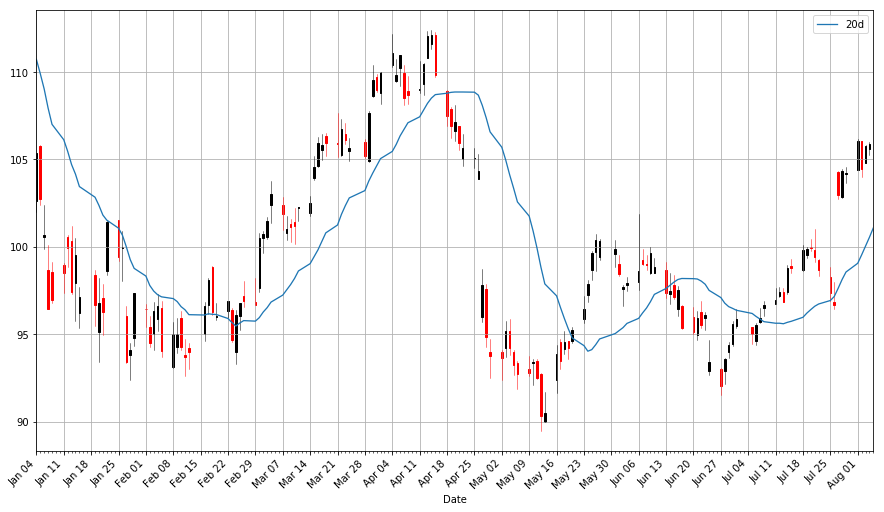

In [16]:
start = datetime.datetime(2010,1,1)
apple = data.DataReader("AAPL", "google", start, end)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = "20d")

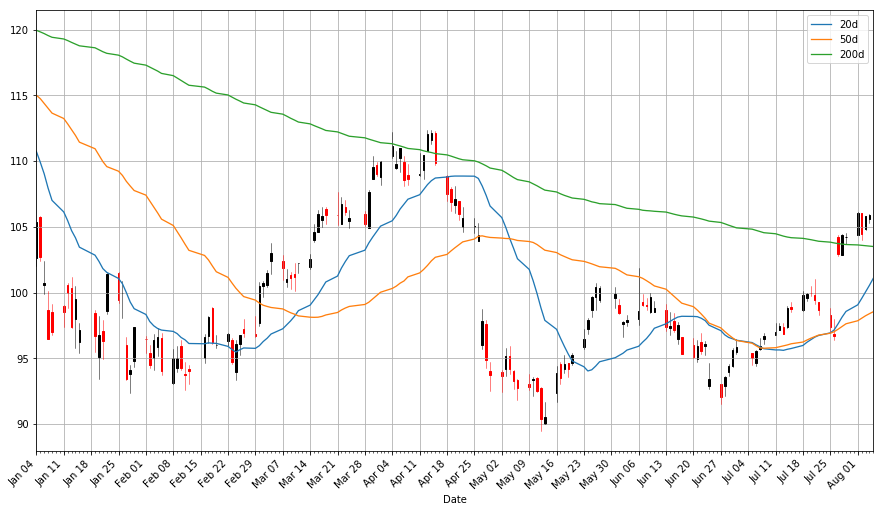

In [17]:
apple["50d"] = np.round(apple["Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Close"].rolling(window = 200, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = ["20d", "50d", "200d"])


In [18]:
apple['20d-50d'] = apple['20d'] - apple['50d']
apple.tail()

,Open,High,Low,Close,Volume,20d,50d,200d,20d-50d
Date,,,,,,,,,
2017-06-12,145.74,146.09,142.51,145.42,72307330,153.19,148.59,127.29,4.60
2017-06-13,147.16,147.45,145.15,146.59,34165445,152.74,148.64,127.48,4.10
2017-06-14,147.50,147.50,143.84,145.16,31531232,152.22,148.67,127.67,3.55
2017-06-15,143.32,144.48,142.21,144.29,32165373,151.92,148.66,127.86,3.26
2017-06-16,143.78,144.50,142.20,142.27,50361093,151.41,148.63,128.04,2.78


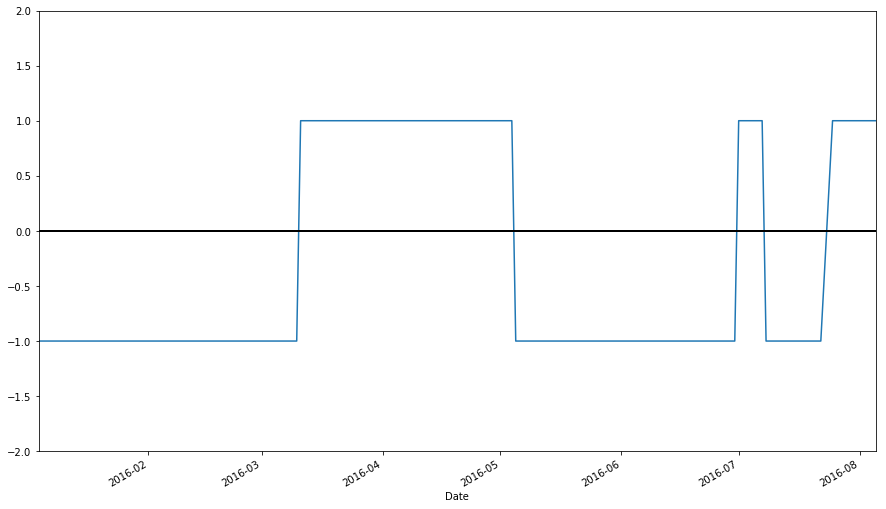

In [19]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
apple["Regime"] = np.where(apple['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
apple["Regime"] = np.where(apple['20d-50d'] < 0, -1, apple["Regime"])
apple.loc['2016-01-01':'2016-08-07',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)


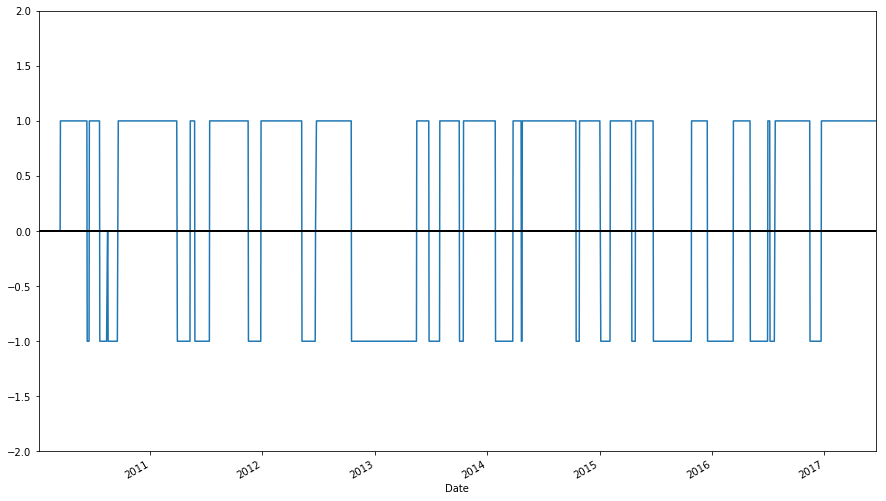

In [20]:
apple["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [21]:
apple["Regime"].value_counts()

 1    1184
-1     639
 0      53
Name: Regime, dtype: int64

In [25]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = apple.ix[-1, "Regime"]
apple.ix[-1, "Regime"] = 0
apple["Signal"] = np.sign(apple["Regime"] - apple["Regime"].shift(1))
# Restore original regime data
apple.ix[-1, "Regime"] = regime_orig
apple.tail()

,Open,High,Low,Close,Volume,20d,50d,200d,20d-50d,Regime,Signal
Date,,,,,,,,,,,
2017-06-12,145.74,146.09,142.51,145.42,72307330,153.19,148.59,127.29,4.60,1.0,0.0
2017-06-13,147.16,147.45,145.15,146.59,34165445,152.74,148.64,127.48,4.10,1.0,0.0
2017-06-14,147.50,147.50,143.84,145.16,31531232,152.22,148.67,127.67,3.55,1.0,0.0
2017-06-15,143.32,144.48,142.21,144.29,32165373,151.92,148.66,127.86,3.26,1.0,0.0
2017-06-16,143.78,144.50,142.20,142.27,50361093,151.41,148.63,128.04,2.78,0.0,-1.0


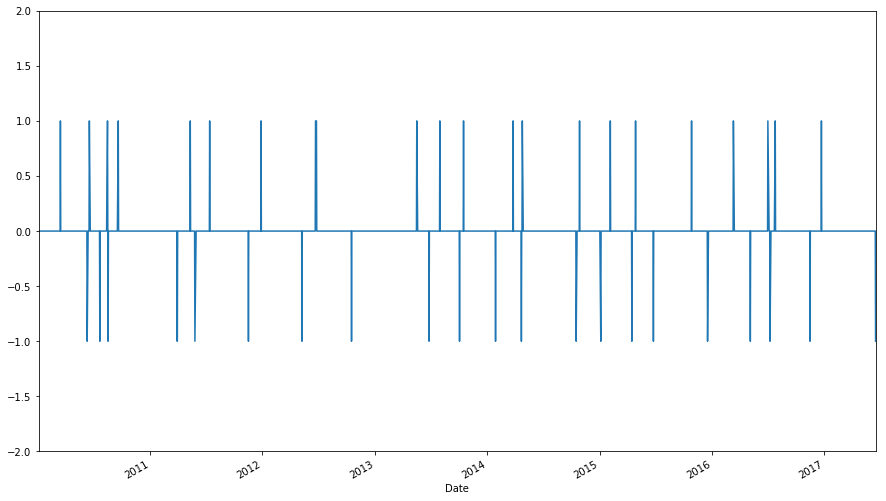

In [27]:
apple["Signal"].plot(ylim = (-2, 2))apple["Signal"].value_counts()

In [28]:
apple["Signal"].value_counts()

 0.0    1831
-1.0      22
 1.0      22
Name: Signal, dtype: int64

In [29]:
apple.loc[apple["Signal"] == 1, "Close"]

Date
2010-03-16     32.06
2010-06-18     39.15
2010-08-16     35.38
2010-09-20     40.46
2011-05-12     49.51
2011-07-14     51.11
2011-12-28     57.52
2012-06-22     83.16
2012-06-25     81.54
2013-05-17     61.89
2013-07-31     64.65
2013-10-16     71.59
2014-03-26     77.11
2014-04-25     81.71
2014-10-28    106.74
2015-02-05    119.94
2015-04-28    130.56
2015-10-27    114.55
2016-03-11    102.26
2016-07-01     95.89
2016-07-25     97.34
2016-12-22    116.29
Name: Close, dtype: float64

In [30]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
apple_signals = pd.concat([
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == 1, "Close"],
                     "Regime": apple.loc[apple["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == -1, "Close"],
                     "Regime": apple.loc[apple["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
apple_signals.sort_index(inplace = True)
apple_signals

,Price,Regime,Signal
Date,,,
2010-03-16,32.06,1.0,Buy
2010-06-11,36.22,-1.0,Sell
2010-06-18,39.15,1.0,Buy
2010-07-22,37.00,-1.0,Sell
2010-08-16,35.38,0.0,Buy
2010-08-18,36.15,-1.0,Sell
2010-09-20,40.46,1.0,Buy
2011-03-30,49.80,0.0,Sell
2011-03-31,49.79,-1.0,Sell
